## Task 4.10

In [2]:
# Import libraries
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy

In [3]:
# Import path
path = r'/Users/hannahstrassmann/Desktop/Achievment four Project/two Data'

In [4]:
# Import datafram
df_opc_merged = pd.read_pickle(os.path.join(path, 'Prepared Data', 'opc_merged.pkl'))

In [5]:
# Checking df
df_opc_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_period_of_day_2,First Name,Surnam,Gender,State,Age,date_joined,number_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,average orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# creating 'Region' column
df_opc_merged.loc[(df_opc_merged['State']).isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Yersey']), 'Region'] = 'Northeast'
df_opc_merged.loc[(df_opc_merged['State']).isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'
df_opc_merged.loc[(df_opc_merged['State']).isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'
df_opc_merged.loc[(df_opc_merged['State']).isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

In [7]:
df_opc_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surnam,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [8]:
# creating Crosstab for region and spending flag
crosstab = pd.crosstab(df_opc_merged['Region'], df_opc_merged['spending flag'], dropna = False)
                    

In [9]:
crosstab.to_clipboard()

Excluding low-activity customerrs

In [11]:
df_opc_merged.loc[df_opc_merged['order_number']<5, 'exclusion flag'] = 'low-activity customers'
df_opc_merged.loc[df_opc_merged['order_number']>5, 'exclusion flag'] = 'high-activity customers'

In [12]:
df_opc_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Surnam,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,Region,exclusion flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,low-activity customers
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,low-activity customers
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,low-activity customers
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,low-activity customers
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,low-activity customers


In [13]:
df_opc_merged['exclusion flag'].head()

0    low-activity customers
1    low-activity customers
2    low-activity customers
3    low-activity customers
4    low-activity customers
Name: exclusion flag, dtype: object

In [14]:
df_opc_merged_new = df_opc_merged.loc[(df_opc_merged['order_number'] >= 5 )]

In [15]:
df_opc_merged_new['exclusion flag'].value_counts (dropna = False)

exclusion flag
high-activity customers    22787976
NaN                         1626901
Name: count, dtype: int64

In [16]:
# creatig column omnivore/vegan
result = []

for value in df_opc_merged_new['department_id']: 
    if value in [12, 16]:
        result.append('omnivore')
    else:
        result.append('vegetarian')

In [18]:
df_opc_merged_new['diet'] = result

/var/folders/pb/ntsf5rfn1rs9pmdn1yzhjxnw0000gn/T/ipykernel_12584/3024927495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opc_merged_new['diet'] = result


In [19]:
df_opc_merged_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,Region,exclusion flag,diet
21,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian
22,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian
23,431534,1,5,4,15,28.0,10258,3,1,Pistachios,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian
24,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,omnivore
25,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,...,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian


In [240]:
#Creating Column family/single
result = []

for value in df_opc_merged_new['number_of_dependants']: 
    if value ==0:
        result.append('single')
    else:
        result.append('family')

In [21]:
df_opc_merged_new['number_of_dependants'].value_counts (dropna = False)

number_of_dependants
3    6133537
0    6105002
2    6094231
1    6082107
Name: count, dtype: int64

In [23]:
df_opc_merged_new['single_or_family'] = result

/var/folders/pb/ntsf5rfn1rs9pmdn1yzhjxnw0000gn/T/ipykernel_12584/1464188904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opc_merged_new['single_or_family'] = result


In [24]:
df_opc_merged_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,number_of_dependants,fam_status,income,Region,exclusion flag,diet,single_or_family
21,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family
22,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family
23,431534,1,5,4,15,28.0,10258,3,1,Pistachios,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family
24,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,omnivore,family
25,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family


In [25]:
# Creating column retired/working
result = []

for value in df_opc_merged_new['Age']: 
    if value >= 65:
        result.append('retired')
    else:
        result.append('working')

In [26]:
df_opc_merged_new ['working_or_senior'] = result

/var/folders/pb/ntsf5rfn1rs9pmdn1yzhjxnw0000gn/T/ipykernel_12584/3876924596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opc_merged_new ['working_or_senior'] = result


In [27]:
df_opc_merged_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,number_of_dependants,fam_status,income,Region,exclusion flag,diet,single_or_family,working_or_senior
21,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working
22,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working
23,431534,1,5,4,15,28.0,10258,3,1,Pistachios,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working
24,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,...,31,2/17/2019,3,married,40423,South,NaN,omnivore,family,working
25,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working


In [28]:
# creating Column income level
def income_label(row):
    
    if row['income'] <= 66000:
        return 'below-average'
    elif (row['income'] > 66000) and (row ['income'] <= 67000):
        return 'average'
    elif row ['income'] > 67000:
        return 'over-average'
    else: return 'not enough data'
    

In [29]:
df_opc_merged_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,number_of_dependants,fam_status,income,Region,exclusion flag,diet,single_or_family,working_or_senior
21,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working
22,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working
23,431534,1,5,4,15,28.0,10258,3,1,Pistachios,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working
24,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,...,31,2/17/2019,3,married,40423,South,NaN,omnivore,family,working
25,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,...,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working


In [30]:
df_opc_merged_new['income_level'] = df_opc_merged_new.apply(income_label,axis = 1)

/var/folders/pb/ntsf5rfn1rs9pmdn1yzhjxnw0000gn/T/ipykernel_12584/3023216415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opc_merged_new['income_level'] = df_opc_merged_new.apply(income_label,axis = 1)


In [31]:
df_opc_merged_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,fam_status,income,Region,exclusion flag,diet,single_or_family,working_or_senior,income_level
21,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average
22,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average
23,431534,1,5,4,15,28.0,10258,3,1,Pistachios,...,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average
24,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,...,2/17/2019,3,married,40423,South,NaN,omnivore,family,working,below-average
25,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,...,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average


In [32]:
# Spending flag agg for mean, min, max
df_opc_merged_new.groupby('spending flag').agg({'ordering_frequency' : ['mean', 'min', 'max']})

ordering_frequency           
                            mean  min   max
spending flag                              
high spender            8.710541  0.0  30.0
low spender             8.956413  0.0  30.0

In [33]:
# order frequency agg for mena, min, max
df_opc_merged_new.groupby('order_frequency_flag').agg({'spending_habits' : ['mean', 'min', 'max']})

spending_habits                  
                                 mean  min          max
order_frequency_flag                                   
frequent customer            9.619944  1.4  2045.412821
non-frequent customer       10.156091  1.0  2410.696774
regular customer            10.258648  1.0  1363.311364

In [34]:
df_opc_merged_new.shape

(24414877, 40)

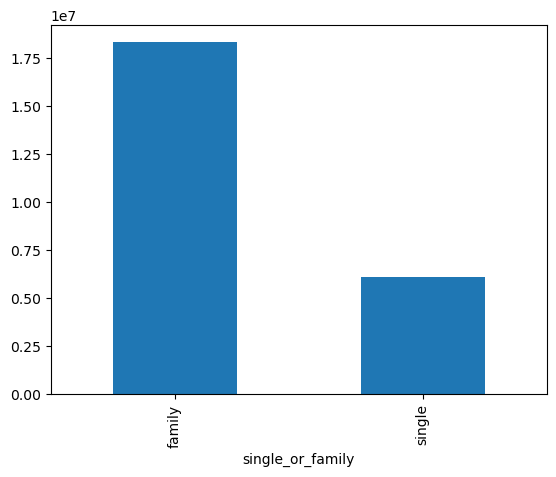

In [35]:
# Creating bar chart for family/single frequency distribution
bar_family_single = df_opc_merged_new ['single_or_family'].value_counts().plot.bar()

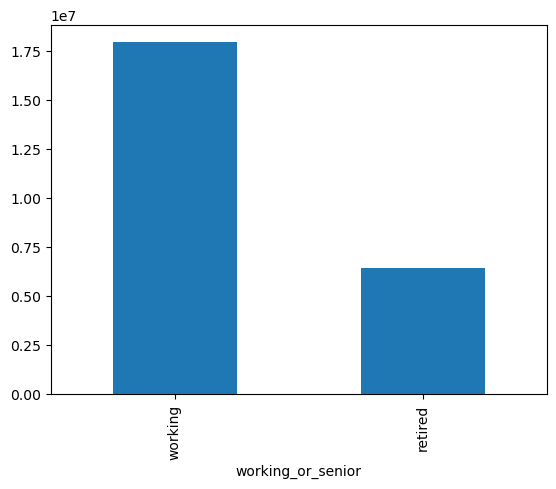

In [36]:
# creating bar chart for working/retired frequency distribution
bar_working_or_senior= df_opc_merged_new ['working_or_senior'].value_counts().plot.bar()

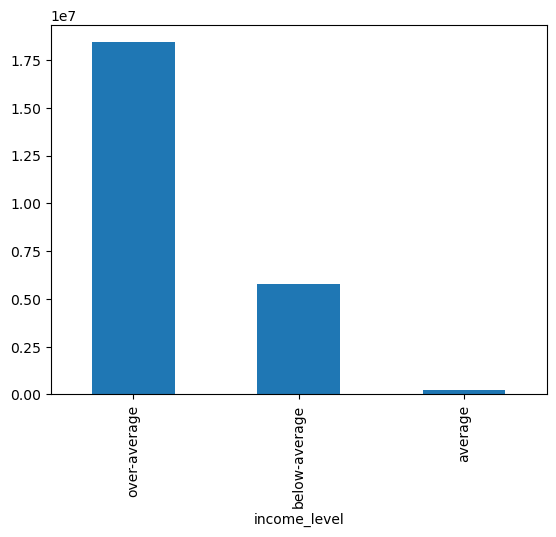

In [37]:
# Creating bar chart for income level frequency distribution
bar_income_level= df_opc_merged_new ['income_level'].value_counts().plot.bar()

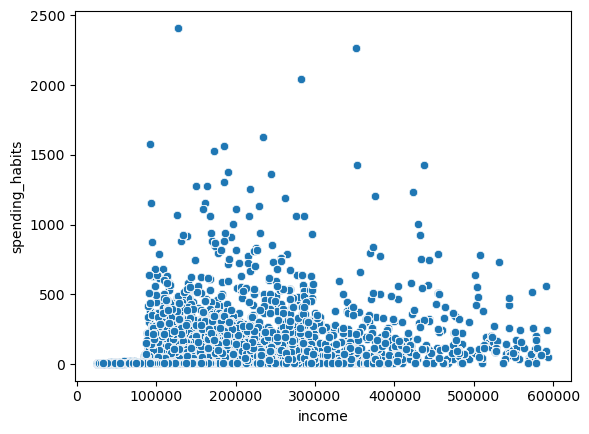

In [250]:
# Creating scatterplot for income and spending habits
scatter_income_spending2 = sns.scatterplot (x = 'income', y = 'spending_habits', data = df_opc_merged_new)

In [39]:
# Crosstab for region and income level
crosstab = pd.crosstab(df_opc_merged_new ['Region'], df_opc_merged_new ['income_level'], dropna = False)
                       

In [40]:
crosstab.to_clipboard()

In [41]:
# crosstab for region and order frequency flag
crosstab_2 = pd.crosstab(df_opc_merged_new ['Region'], df_opc_merged_new ['order_frequency_flag'], dropna = False)

In [42]:
crosstab_2.to_clipboard()

In [43]:
# crosstab for region and diet
crosstab_3 = pd.crosstab (df_opc_merged_new ['Region'], df_opc_merged_new ['diet'], dropna = False)

In [44]:
crosstab_3.to_clipboard()

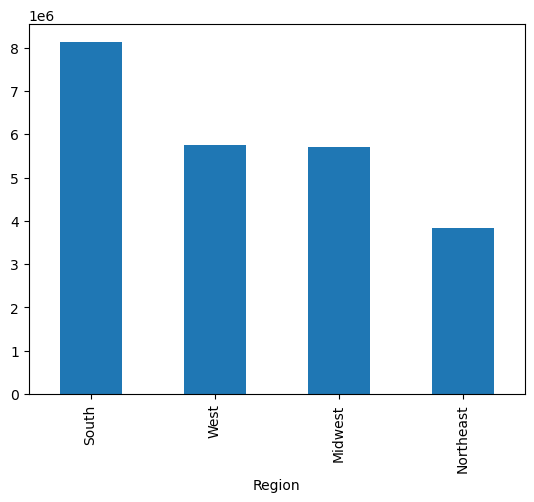

In [46]:
# bar chart for region frequency distribution
bar_Region = df_opc_merged_new ['Region'].value_counts().plot.bar()

In [99]:
# Remove max columns display
pd.set_option('display.max_columns', None)

In [101]:
df_opc_merged_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest_days_loc,busiest_period_of_day,max_order,loyalty_flag,spending_habits,spending flag,ordering_frequency,order_frequency_flag,busiest_period_of_day_2,First Name,Surnam,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,Region,exclusion flag,diet,single_or_family,working_or_senior,income_level
21,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,mid-range product,least busy,least busiest days,most orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,most orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average
22,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,23,19,4.4,both,low-range product,least busy,least busiest days,most orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,most orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average
23,431534,1,5,4,15,28.0,10258,3,1,Pistachios,117,19,3.0,both,low-range product,least busy,least busiest days,most orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,most orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average
24,431534,1,5,4,15,28.0,25133,4,1,Organic String Cheese,21,16,8.6,both,mid-range product,least busy,least busiest days,most orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,most orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,omnivore,family,working,below-average
25,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,24,4,2.7,both,low-range product,least busy,least busiest days,most orders,10,new customer,6.367797,low spender,20.5,non-frequent customer,most orders 2,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN,vegetarian,family,working,below-average


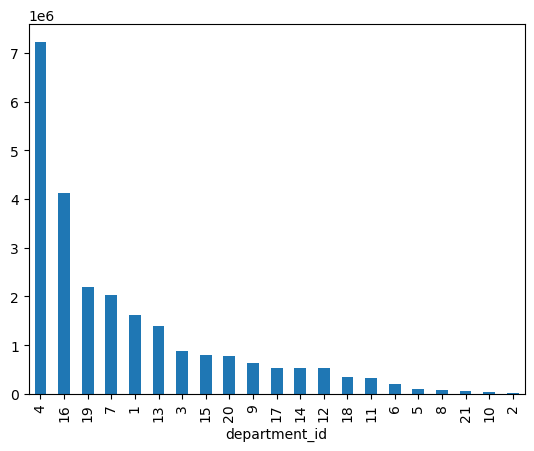

In [103]:
# Bar chart for department id frequency distribution
bar_dep = df_opc_merged_new ['department_id'].value_counts().plot.bar()

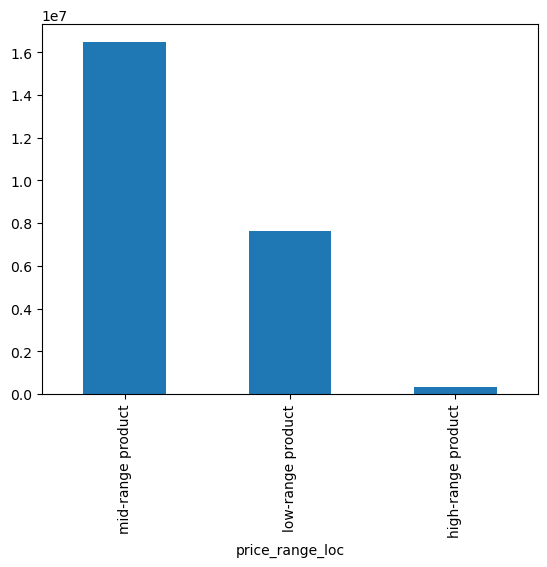

In [112]:
# Bar chart for price range loc frequency distribution
bar_price_range = df_opc_merged_new ['price_range_loc'].value_counts().plot.bar()

In [114]:
# crosstab for region and price range loc
crosstab_5 = pd.crosstab(df_opc_merged_new ['Region'], df_opc_merged_new ['price_range_loc'], dropna = False)

In [118]:
crosstab_5.to_clipboard()

In [120]:
# Crosstab for region and spending flag
crosstab_6 = pd.crosstab(df_opc_merged_new ['Region'], df_opc_merged_new ['spending flag'], dropna = False)

In [122]:
crosstab_6.to_clipboard()

In [130]:
# Crosstab for family/single and price range loc
crosstab_fam = pd.crosstab(df_opc_merged_new ['single_or_family'], df_opc_merged_new ['price_range_loc'], dropna = False)

In [132]:
crosstab_fam.to_clipboard()

In [134]:
# crosstab for family/single and spending flag
crosstab_fam2 = pd.crosstab(df_opc_merged_new ['single_or_family'], df_opc_merged_new ['spending flag'], dropna = False)

In [136]:
crosstab_fam2.to_clipboard()

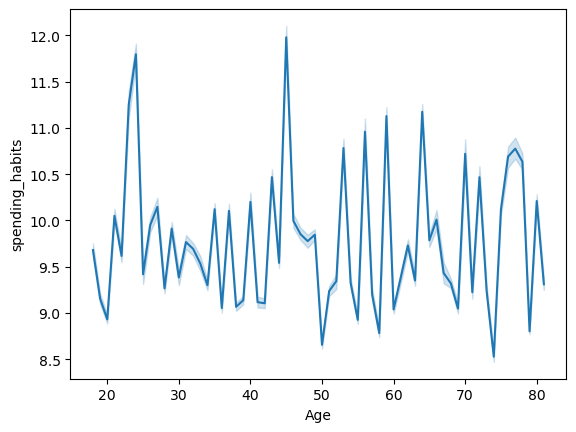

In [224]:
# Line chart for Age and spending habits
line_age_spend = sns.lineplot (data = df_opc_merged_new, x = 'Age', y = 'spending_habits')

In [156]:
# Crosstab for family/single and order frequency flag
crosstab_fam3 = pd.crosstab(df_opc_merged_new ['single_or_family'], df_opc_merged_new ['order_frequency_flag'], dropna = False)

In [164]:
crosstab_fam3.to_clipboard()

In [166]:
# Crosstab for wrking/senior and spending flag
crosstab_work_sen2 = pd.crosstab(df_opc_merged_new ['working_or_senior'], df_opc_merged_new ['spending flag'], dropna = False)

In [174]:
crosstab_work_sen2.to_clipboard()

In [176]:
# Crosstab for working/senior and orde frequency flag
crosstab_work_sen = pd.crosstab(df_opc_merged_new ['working_or_senior'], df_opc_merged_new ['order_frequency_flag'], dropna = False)

In [178]:
crosstab_work_sen.to_clipboard()

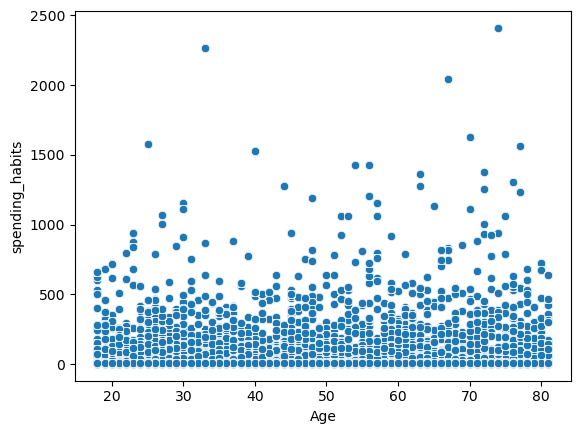

In [180]:
# Scatterplot for age and spending habits
scatter_income_spending = sns.scatterplot (x = 'Age', y = 'spending_habits', data = df_opc_merged_new)

In [184]:
#Crosstab for working/senior and price range loc
crosstab_work_sen3 = pd.crosstab(df_opc_merged_new ['working_or_senior'], df_opc_merged_new ['price_range_loc'], dropna = False)

In [188]:
crosstab_work_sen3.to_clipboard()

In [196]:
# Crosstab for income level and price range loc
crosstab_income = pd.crosstab(df_opc_merged_new ['income_level'], df_opc_merged_new ['price_range_loc'], dropna = False)

In [197]:
crosstab_income.to_clipboard()

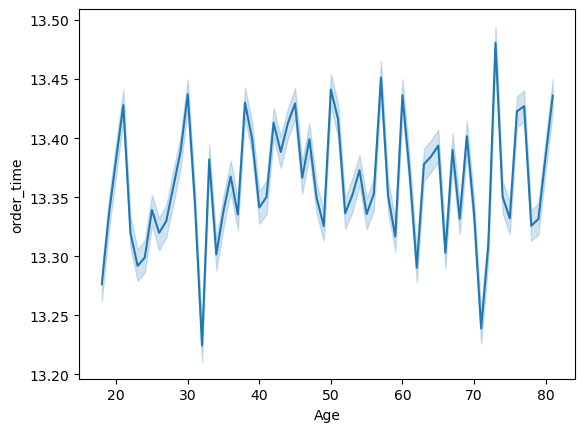

In [202]:
# Line graph for age and order time
line_age_tiime = sns.lineplot (data = df_opc_merged_new, x = 'Age', y = 'order_time')

Export all plots and graphs

In [206]:
# Import path for figure export
path_2 = r'/Users/hannahstrassmann/Desktop/Achievment four Project/04 Analysis'

In [212]:
bar_family_single.figure.savefig (os.path.join(path_2, 'Visualisations', 'bar_family_single.png'))

In [214]:
bar_working_or_senior.figure.savefig (os.path.join(path_2, 'Visualisations', 'bar_working_or_senior.png'))

In [216]:
bar_income_level.figure.savefig (os.path.join(path_2, 'Visualisations', 'bar_income_level.png'))

In [218]:
bar_Region.figure.savefig (os.path.join(path_2, 'Visualisations', 'bar_Region.png'))

In [220]:
bar_dep.figure.savefig (os.path.join(path_2, 'Visualisations', 'bar_dep.png'))

In [222]:
bar_price_range.figure.savefig (os.path.join(path_2, 'Visualisations', 'bar_price_range.png'))

In [230]:
line_age_spend.figure.savefig (os.path.join(path_2, 'Visualisations', 'line_age_spend.png'))

In [232]:
line_age_tiime.figure.savefig (os.path.join(path_2, 'Visualisations', 'line_age_tiime.png'))

In [234]:
scatter_age_time.figure.savefig (os.path.join(path_2, 'Visualisations', 'scatter_age_time.png'))

In [256]:
scatter_income_spending.figure.savefig (os.path.join(path_2, 'Visualisations', 'scatter_income_spending.png'))

In [246]:
df_opc_merged_new.shape

(24414877, 40)

In [254]:
scatter_income_spending2.figure.savefig (os.path.join(path_2, 'Visualisations', 'scatter_income_spending2.png'))